# Assignment 2
Letter Recognition using Deep Learning

In [1]:
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/letterrecognition-using-svm/letter-recognition.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
df.fillna(-99999, axis=1, inplace=True)

## With dimensionality reduction

In [4]:
features = df.drop(columns=['letter'], axis=1)

In [5]:
scaler = StandardScaler()
features_scaled = scaler.fit(features)
features_scaled = scaler.transform(features)

In [6]:
pca = PCA(n_components=2)
features_pca = pca.fit(features_scaled)
features_pca = pca.transform(features_scaled)
print(features.shape)
print(features_pca.shape)

(20000, 16)
(20000, 2)


In [7]:
labels = np.array([ord(letter)-52-13 for letter in np.array(df['letter'])])
labels

array([19,  8,  3, ..., 19, 18,  0])

In [8]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [9]:
df = pd.DataFrame(features_pca, columns=["1st component", "2nd component"])
df["letter"] = labels.astype(float)
df

,1st component,2nd component,letter
0,-2.080335,-1.721468,19.0
1,0.369373,2.014128,8.0
2,1.654349,1.754984,3.0
3,1.490280,-0.508874,13.0
4,-3.080981,2.069842,6.0
...,...,...,...
19995,-2.380036,0.131237,3.0
19996,1.957901,-1.326365,2.0
19997,1.285032,-3.849969,19.0
19998,-2.345298,0.183456,18.0


<Axes: xlabel='1st component', ylabel='2nd component'>

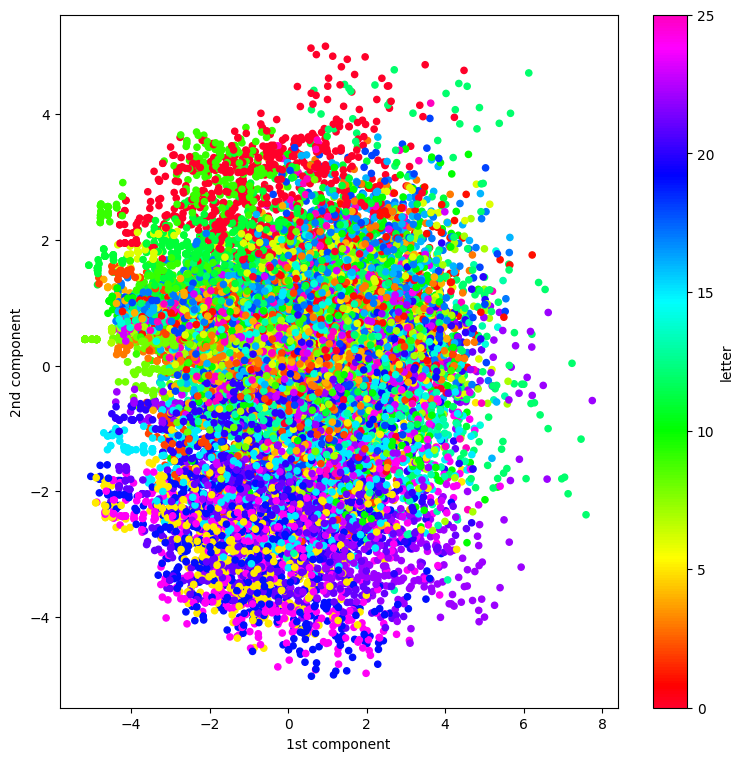

In [10]:
df.plot.scatter(x='1st component', y='2nd component', c='letter', cmap='gist_rainbow', figsize=(9,9), sharex=False)

In [12]:
tsne = TSNE(n_components=2, random_state=0)
features_embedded = tsne.fit_transform(features_scaled)
features_embedded

array([[-75.54701 , -61.801792],
       [ 66.74869 , -18.252548],
       [ 20.250322,  -9.664129],
       ...,
       [ 20.72964 , -69.45255 ],
       [-16.689909, -12.991912],
       [ 56.397186,  67.27472 ]], dtype=float32)

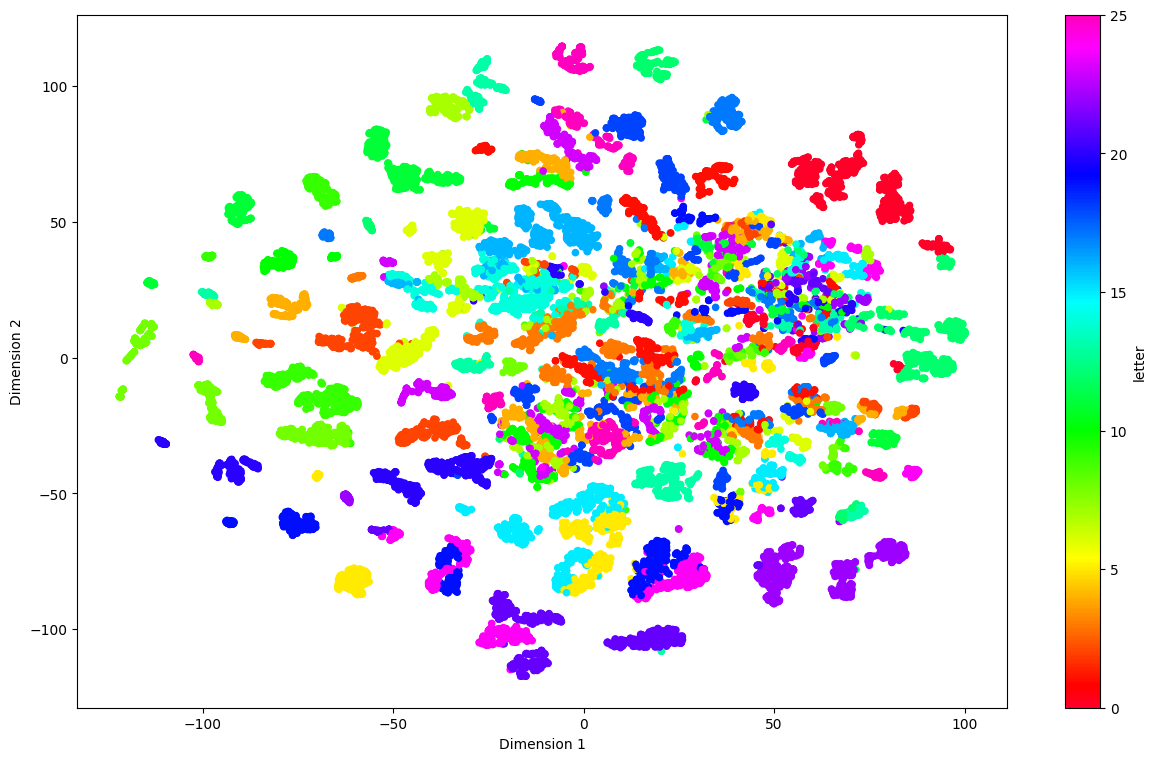

In [13]:
df2 = pd.DataFrame(features_embedded, columns=["Dimension 1", "Dimension 2"])
df2["letter"] = labels
df2.plot.scatter(x='Dimension 1', y='Dimension 2', c='letter', cmap='gist_rainbow', figsize=(15,9), sharex=False);

In [14]:
df2.head()

,Dimension 1,Dimension 2,letter
0,-75.547012,-61.801792,19
1,66.748688,-18.252548,8
2,20.250322,-9.664129,3
3,71.976593,-55.662846,13
4,-45.124180,48.400658,6


In [30]:
X = np.array(df2.drop(['letter'], axis=1))
y = np.array(df2['letter'])
X.shape, y.shape

((20000, 2), (20000,))

In [31]:
y = np.eye(26)[y]

In [32]:
X.shape, y.shape

((20000, 2), (20000, 26))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [34]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(2)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(26, activation='softmax'))

In [35]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, restore_best_weights=True)

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[early_stopping])

Epoch 1/100
500/500 [==============================] - 3s 4ms/step - loss: 2.3736 - accuracy: 0.2594 - val_loss: 2.1519 - val_accuracy: 0.2907
Epoch 2/100
500/500 [==============================] - 2s 3ms/step - loss: 2.0227 - accuracy: 0.3293 - val_loss: 1.9328 - val_accuracy: 0.3595
Epoch 3/100
500/500 [==============================] - 2s 3ms/step - loss: 1.8122 - accuracy: 0.3953 - val_loss: 1.7068 - val_accuracy: 0.4470
Epoch 4/100
500/500 [==============================] - 2s 3ms/step - loss: 1.6044 - accuracy: 0.4667 - val_loss: 1.5172 - val_accuracy: 0.4852
Epoch 5/100
500/500 [==============================] - 2s 3ms/step - loss: 1.3982 - accuracy: 0.5363 - val_loss: 1.3843 - val_accuracy: 0.5393
Epoch 6/100
500/500 [==============================] - 2s 4ms/step - loss: 1.2517 - accuracy: 0.5850 - val_loss: 1.2033 - val_accuracy: 0.6127
Epoch 7/100
500/500 [==============================] - 2s 3ms/step - loss: 1.1320 - accuracy: 0.6277 - val_loss: 1.1269 - val_accuracy: 0.6363

In [37]:
y_pred = model.predict(X_test)

125/125 [==============================] - 0s 1ms/step


In [38]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [39]:
y_pred

array([[7.76192587e-13, 1.39837046e-25, 5.65394985e-05, ...,
        6.13193807e-09, 5.39263929e-05, 3.17205951e-16],
       [1.14109335e-08, 9.44836736e-01, 3.92470995e-12, ...,
        1.88186987e-05, 1.05058374e-02, 6.49158144e-03],
       [1.03913334e-26, 3.58101054e-13, 0.00000000e+00, ...,
        2.24881873e-08, 1.31871066e-12, 9.99894738e-01],
       ...,
       [4.40729397e-10, 1.71266928e-14, 3.59396838e-13, ...,
        2.50167459e-01, 1.06571163e-09, 2.75844902e-11],
       [6.42192655e-20, 3.35185026e-24, 9.28294027e-23, ...,
        2.26183339e-08, 2.00706394e-03, 1.08887465e-11],
       [5.61055833e-29, 1.29269928e-09, 9.93996859e-01, ...,
        1.97942336e-05, 5.97559422e-23, 3.72283821e-14]], dtype=float32)

In [40]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       172
           1       0.91      0.71      0.80       182
           2       0.81      0.80      0.80       128
           3       0.72      0.87      0.79       147
           4       0.72      0.54      0.62       165
           5       0.74      0.83      0.78       150
           6       0.69      0.90      0.78       144
           7       0.70      0.47      0.56       129
           8       0.97      0.82      0.89       152
           9       0.90      0.90      0.90       143
          10       0.65      0.68      0.66       151
          11       0.99      0.90      0.94       146
          12       0.78      0.90      0.84       160
          13       0.84      0.89      0.86       167
          14       0.89      0.81      0.85       143
          15       0.83      0.80      0.81       172
          16       0.79      0.92      0.85       137
          17       0.75    

## Without Dimensionality Reduction

In [55]:
df = pd.read_csv('/kaggle/input/letterrecognition-using-svm/letter-recognition.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [56]:
X = df.drop(['letter'], axis=1)
y = df['letter']

In [57]:
y = np.array([ord(letter)-52-13 for letter in y])
y

array([19,  8,  3, ..., 19, 18,  0])

In [58]:
X.shape, y.shape

((20000, 16), (20000,))

In [59]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [60]:
y = np.eye(26)[y]

In [61]:
X.shape, y.shape

((20000, 16), (20000, 26))

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [139]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(16)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(26, activation='softmax'))

In [140]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.005, patience=3, restore_best_weights=True)

In [141]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping])

Epoch 1/30
400/400 [==============================] - 3s 4ms/step - loss: 2.0293 - accuracy: 0.4597 - val_loss: 1.2803 - val_accuracy: 0.6375
Epoch 2/30
400/400 [==============================] - 1s 3ms/step - loss: 1.0140 - accuracy: 0.7204 - val_loss: 0.8971 - val_accuracy: 0.7475
Epoch 3/30
400/400 [==============================] - 1s 3ms/step - loss: 0.7796 - accuracy: 0.7793 - val_loss: 0.7323 - val_accuracy: 0.7972
Epoch 4/30
400/400 [==============================] - 1s 3ms/step - loss: 0.6551 - accuracy: 0.8184 - val_loss: 0.6385 - val_accuracy: 0.8184
Epoch 5/30
400/400 [==============================] - 1s 3ms/step - loss: 0.5713 - accuracy: 0.8391 - val_loss: 0.5666 - val_accuracy: 0.8363
Epoch 6/30
400/400 [==============================] - 1s 3ms/step - loss: 0.5083 - accuracy: 0.8580 - val_loss: 0.5184 - val_accuracy: 0.8556
Epoch 7/30
400/400 [==============================] - 1s 3ms/step - loss: 0.4587 - accuracy: 0.8699 - val_loss: 0.4708 - val_accuracy: 0.8631
Epoch 

In [142]:
model.evaluate(X_test, y_test)

125/125 [==============================] - 0s 2ms/step - loss: 0.1967 - accuracy: 0.9380


[0.1967216283082962, 0.9380000233650208]

In [143]:
y_pred = model.predict(X_test)

125/125 [==============================] - 0s 1ms/step


In [144]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       143
           1       0.91      0.90      0.91       166
           2       0.97      0.93      0.95       151
           3       0.95      0.93      0.94       160
           4       0.92      0.92      0.92       154
           5       0.94      0.90      0.92       148
           6       0.93      0.93      0.93       150
           7       0.89      0.91      0.90       153
           8       0.97      0.93      0.95       161
           9       0.95      0.94      0.95       167
          10       0.92      0.91      0.92       135
          11       0.97      0.99      0.98       163
          12       0.93      0.99      0.96       144
          13       0.93      0.98      0.95       161
          14       0.90      0.97      0.93       152
          15       0.94      0.92      0.93       178
          16       0.95      0.96      0.96       169
          17       0.90    